# WEB SCRAPPING

In [ ]:
import requests as rs
from bs4 import BeautifulSoup
import pandas as pd
import time

urls = [
    'https://reviews.femaledaily.com/products/treatment/serum-essence/elsheskin/retinol-rejuvenating-night-serum',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/for-skin-s-sake-fss/retinol-serum-1',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/glowlabs/retinol-cica-night-serum',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/skintific/gentle-a-retinol-renewal-serum?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/the-originote/the-originote-retinol-b3-serum-1?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/somethinc/level-1-retinol?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/pratista/retinol-renewal-serum-1?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/azarine-cosmetic/retinol-smooth-glowing-serum-encapsulated-gentle-retinol-3?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/avoskin/miraculous-retinol-ampoule?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=',
    'https://reviews.femaledaily.com/products/treatment/serum-essence/bhumi/hpr-retinol-serum-2?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page='
]
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

skin_type = []
usage_periode = []
semua_review = []
ratings = []

for url in urls:
    for page in range(1, 100):
        url_page = url + str(page)
        web = rs.get(url_page, headers=headers)
        soup = BeautifulSoup(web.text, 'html.parser')

        current_page_skin_type = [skin.text.strip() for skin in soup.find_all('p', {'class': 'profile-description'})]
        current_page_usage_periode = [use.text.strip() for use in soup.find_all('div', {'class': 'information-wrapper'})]
        current_page_reviews = [review.text.strip() for review in soup.find_all('p', {'class': 'text-content'})]

        for rating_wrapper in soup.find_all('div', {'class': 'review-card-rating-wrapper'}):
            full_stars = len(rating_wrapper.find_all('i', {'class': 'icon-ic_big_star_full'}))  # Bintang penuh
            grey_stars = len(rating_wrapper.find_all('i', {'class': 'icon-ic_big_star_grey'}))  # Bintang kosong

            total_stars = full_stars
            if total_stars > 0:
                ratings.append(total_stars)
            else:
                ratings.append('N/A')

        if not current_page_reviews:
            print(f"Stopping, no reviews found on page {page} for URL: {url}")
            break

        skin_type.extend(current_page_skin_type)
        usage_periode.extend(current_page_usage_periode)
        semua_review.extend(current_page_reviews)
        time.sleep(2)

print(len(skin_type), len(usage_periode), len(semua_review), len(ratings))
max_length = max(len(skin_type), len(usage_periode), len(semua_review), len(ratings))
skin_type.extend(["N/A"] * (max_length - len(skin_type)))
usage_periode.extend(["N/A"] * (max_length - len(usage_periode)))
semua_review.extend(["N/A"] * (max_length - len(semua_review)))
ratings.extend(["N/A"] * (max_length - len(ratings)))

df = pd.DataFrame({
    'Skin Type': skin_type,
    'Usage Periode': usage_periode,
    'Review': semua_review,
    'Rating': ratings
})

try:
    df.to_csv('reviews.csv', index=False)
    print("Data saved successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

print(df.head())

Stopping, no reviews found on page 1 for URL: https://reviews.femaledaily.com/products/treatment/serum-essence/elsheskin/retinol-rejuvenating-night-serum
Stopping, no reviews found on page 3 for URL: https://reviews.femaledaily.com/products/treatment/serum-essence/for-skin-s-sake-fss/retinol-serum-1
Stopping, no reviews found on page 1 for URL: https://reviews.femaledaily.com/products/treatment/serum-essence/glowlabs/retinol-cica-night-serum
Stopping, no reviews found on page 12 for URL: https://reviews.femaledaily.com/products/treatment/serum-essence/skintific/gentle-a-retinol-renewal-serum?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=
Stopping, no reviews found on page 24 for URL: https://reviews.femaledaily.com/products/treatment/serum-essence/the-originote/the-originote-retinol-b3-serum-1?cat=&cat_id=0&age_range=&skin_type=&skin_tone=&skin_undertone=&hair_texture=&hair_type=&order=newest&page=
Stopping, no reviews found o

# PRE-PROCCESSING

In [ ]:
import pandas as pd
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = set(stopwords.words('indonesian')).union(set(stopwords.words('english')))
kamus_alay = "/content/colloquial-indonesian-lexicon.csv"
df_slang = pd.read_csv(kamus_alay)
alay_dict = dict(zip(df_slang['slang'], df_slang['formal']))

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'<.*?>', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text)
    return text.strip()

def casefold_text(text):
    if isinstance(text, str):
        return text.lower()
    return text

def normalize_text(text):
    if isinstance(text, str):
        words = text.split()
        normalized_words = [alay_dict.get(word, word) for word in words]
        return ' '.join(normalized_words)
    return text

def filter_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    return text

def stem_text(text):
    if isinstance(text, str):
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)
    return text

file_path = "/content/reviews.csv"
data = pd.read_csv(file_path)
kolom_target = 'Review'

# Output preprocessing
data[kolom_target] = data[kolom_target].apply(clean_text)
data[kolom_target] = data[kolom_target].apply(casefold_text)
data[kolom_target] = data[kolom_target].apply(normalize_text)
data[kolom_target] = data[kolom_target].apply(filter_stopwords)
data[kolom_target] = data[kolom_target].apply(stem_text)

output_path = "cleaned_data_reviews.csv"
data.to_csv(output_path, index=False)

print(f"Preprocessing selesai. File hasil disimpan sebagai '{output_path}'")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing selesai. File hasil disimpan sebagai 'cleaned_data_reviews.csv'


In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_list = stopwords.words('indonesian')

custom_stopwords = {"produk", "skincare", "ku", "kali", "banget", "deh", "kayak", "pakai", "lihat", "pokok", "banget", "bikin", "ya"}  # Misal stopword kustom
stopwords_list.extend(custom_stopwords)

print("Updated stopwords:", stopwords_list)

file_path = '/content/labeled_data_reviews.csv'
df = pd.read_csv(file_path)

def remove_stopwords(text):
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word not in stopwords_list]
        return " ".join(filtered_tokens)
    return text


df['cleaned_review'] = df['Review'].apply(remove_stopwords)

df.to_csv('/content/stopwords_filtered.csv', index=False)
df[['Review', 'cleaned_review']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Updated stopwords: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehend

,Review,cleaned_review
0,serum retinol kandung tinggi pakai suprisingly...,serum retinol kandung suprisingly efek tinglin...
1,degan retinolnya mild bikin purging biarpun ku...,degan retinolnya mild purging biarpun kulit se...
2,satu retinol serum lokal produk kali repurchas...,retinol serum lokal repurchase retinol kulit s...
3,coba serum retinol votre peau merk tingkat ret...,coba serum retinol votre peau merk tingkat ret...
4,hitung skincare retinolnya bilang mild ya paka...,hitung retinolnya bilang mild bad effects purg...


# LABELING BASED ON RATE

In [ ]:
import pandas as pd

file_path = "/content/cleaned_data_reviews.csv"
data = pd.read_csv(file_path)
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')  # Jika ada nilai non-numerik, ubah menjadi NaN

def label_data(rating):
    if pd.isna(rating):
        return "Unknown"
    elif rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating <= 2:
        return "Negative"

data['Label'] = data['Rating'].apply(label_data)
output_labeled_path = "labeled_data_reviews.csv"
data.to_csv(output_labeled_path, index=False)

print(f"Data dengan pelebelan selesai. File hasil disimpan sebagai '{output_labeled_path}'")
print(data.head())

Data dengan pelebelan selesai. File hasil disimpan sebagai 'labeled_data_reviews.csv'
                            Skin Type  \
0  Combination, Medium Light, Neutral   
1               Oily, Medium, Neutral   
2                Dry, Medium, Neutral   
3       Normal, Medium Light, Neutral   
4        Combination, Medium, Neutral   

                                       Usage Periode  \
0  Usage Period : More than 1 yearPurchase Point ...   
1  Usage Period : 3 months - 6 monthsPurchase Poi...   
2  Usage Period : More than 1 yearPurchase Point ...   
3  Usage Period : 1 month - 3 monthsPurchase Poin...   
4  Usage Period : 1 month - 3 monthsPurchase Poin...   

                                              Review  Rating     Label  
0  serum retinol kandung tinggi pakai suprisingly...       5  Positive  
1  degan retinolnya mild bikin purging biarpun ku...       4  Positive  
2  satu retinol serum lokal produk kali repurchas...       5  Positive  
3  coba serum retinol votre peau merk 

# Exploratory Data Analysis (EDA)

## Visualisasi Kata yang sering muncul

10 Kata Paling Sering Muncul:
pakai: 3018
retinol: 2028
kulit: 1538
banget: 1430
jerawat: 1025
serum: 915
coba: 859
sih: 720
bikin: 631
produk: 592


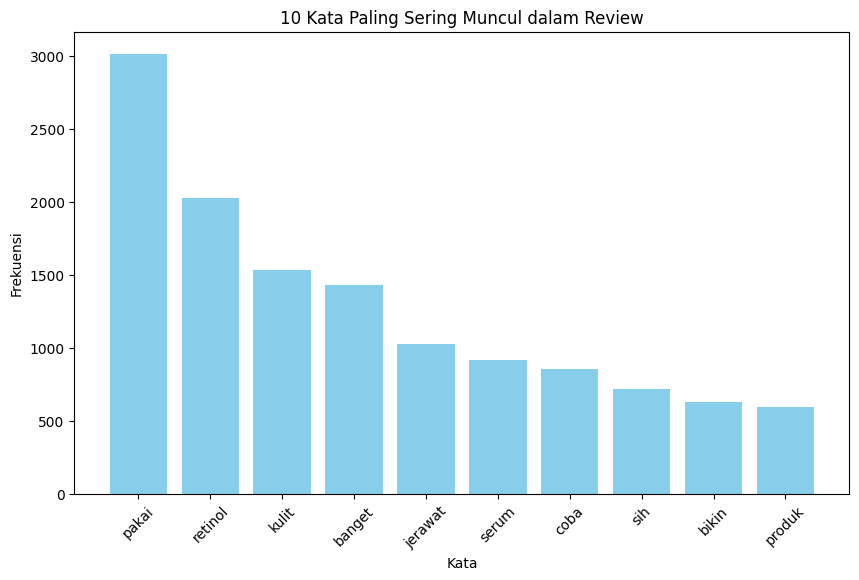

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/stopwords_filtered.csv'
df = pd.read_csv(file_path)

# Gabungkan semua teks di kolom 'Review'
all_reviews = " ".join(df['Review'].dropna().astype(str))

# Pisahkan teks menjadi kata-kata
words = all_reviews.split()

# Hitung frekuensi kata
word_counts = Counter(words)

# Tampilkan 10 kata paling sering muncul
top_words = word_counts.most_common(10)
print("10 Kata Paling Sering Muncul:")
for word, count in top_words:
    print(f"{word}: {count}")

# Visualisasi dengan bar chart
words, counts = zip(*top_words)  # Pisahkan kata dan jumlah kemunculannya
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("10 Kata Paling Sering Muncul dalam Review")
plt.xticks(rotation=45)
plt.show()


## Pengecekan Imbbalance Data

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('/content/stopwords_filtered.csv')

# Menampilkan jumlah data pada masing-masing rating bintang
print(f"Input data memiliki {len(df)} baris dan {len(df.columns)} kolom")
print(f"rating bintang 1 = {len(df[df['Rating']==1])} baris")
print(f"rating bintang 2 = {len(df[df['Rating']==2])} baris")
print(f"rating bintang 3 = {len(df[df['Rating']==3])} baris")
print(f"rating bintang 4 = {len(df[df['Rating']==4])} baris")
print(f"rating bintang 5 = {len(df[df['Rating']==5])} baris")

# Menampilkan jumlah data pada masing-masing label
label_counts = df['Label'].value_counts()
print("\nJumlah data pada masing-masing label:")
for label, count in label_counts.items():
    print(f"{label}: {count} baris")

Input data memiliki 1437 baris dan 6 kolom
rating bintang 1 = 24 baris
rating bintang 2 = 44 baris
rating bintang 3 = 128 baris
rating bintang 4 = 371 baris
rating bintang 5 = 870 baris

Jumlah data pada masing-masing label:
Positive: 1241 baris
Neutral: 128 baris
Negative: 68 baris


## Visualisasi Distribusi Rating

Number of null in label: 0
Number of null in text: 1


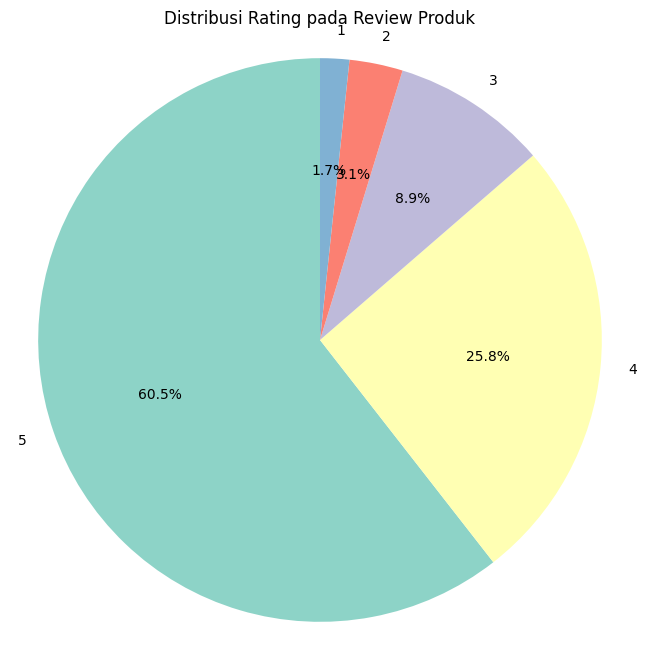

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/stopwords_filtered.csv'
df = pd.read_csv(file_path)

print(f"Number of null in label: {df['Rating'].isnull().sum()}")
print(f"Number of null in text: {df['Review'].isnull().sum()}")

rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(rating_counts)))
plt.title('Distribusi Rating pada Review Produk')
plt.axis('equal')
plt.show()

## WORD CLOUD

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_path = '/content/stopwords_filtered.csv'
df = pd.read_csv(file_path)

df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) ]
df_netral= df[ (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]

negative_list=df_negative['cleaned_review'].tolist()
netral_list=df_netral['cleaned_review'].tolist()
positive_list= df_positive['cleaned_review'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_netral = ("").join(str(netral_list))
filtered_netral = filtered_netral.lower()

filtered_positive = ("").join(str(positive_list))

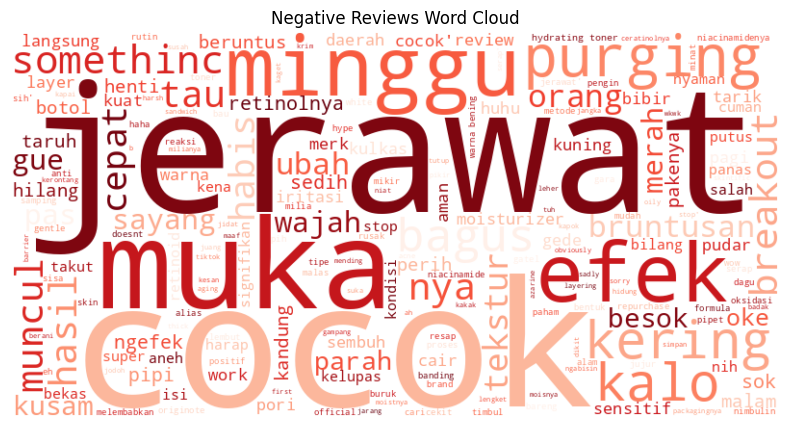

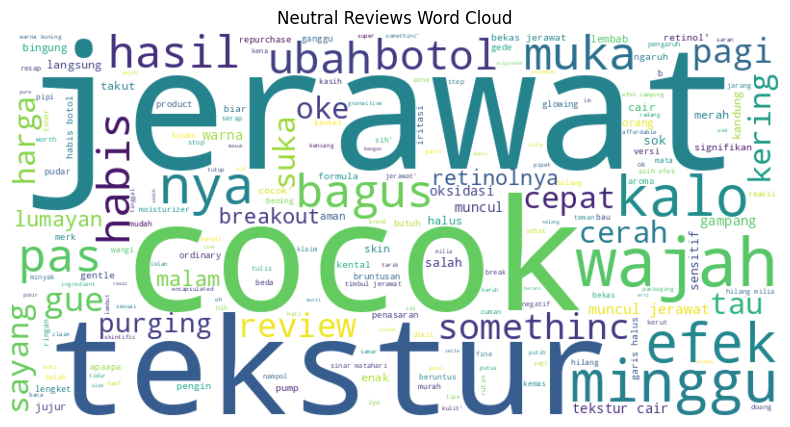

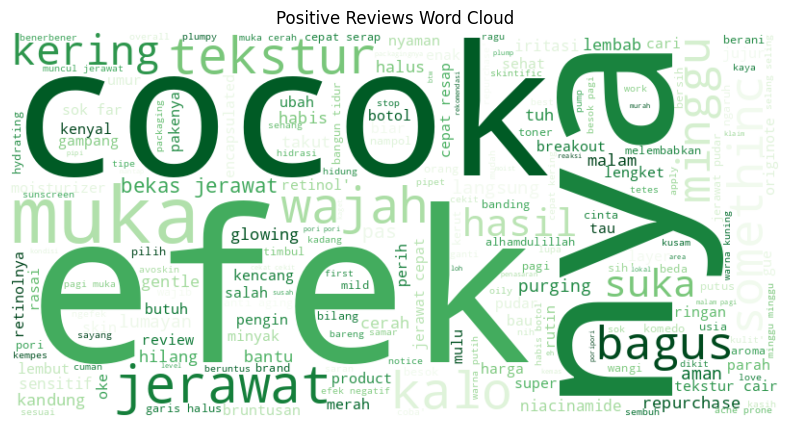

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stopwords = set(["retinol", "kulit", "serum", "coba", "beli", "asa", "sih"])

# word Cloud berdasarkan kategori
wordcloud_negative = WordCloud(width=800, height=400, background_color='white',
                               colormap="Reds", stopwords=custom_stopwords).generate(filtered_negative)

wordcloud_netral = WordCloud(width=800, height=400, background_color='white',
                             stopwords=custom_stopwords).generate(filtered_netral)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white',
                                colormap="Greens", stopwords=custom_stopwords).generate(filtered_positive)

# Negative Reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews Word Cloud")
plt.show()

# Neutral Reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_netral, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Reviews Word Cloud")
plt.show()

# Positive Reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()

# PEMBUATAN MODEL PADA SETIAP FEATURE ENGINEERING

## 1. Algoritma Multinominal Naive Bayes

TF IDF ACCURACY

TF-IDF Matrix (5 rows x 10 columns):
    aa  aaa  aaaa  aaaaa  aagak  aannnd  abad  abis  abisga  abisin
0  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
1  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
2  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
3  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
4  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
Cross-validation Scores: [0.93445378 0.9512605  0.93277311 0.94444444 0.94781145]
Average Cross-validation Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.09      0.08      0.08        13
      Netral       0.24      0.38      0.29        26
     Positif       0.92      0.87      0.89       249

    accuracy                           0.79       288
   macro avg       0.42      0.44      0.42       288
weighted avg       0.82      0.79      0.80       288



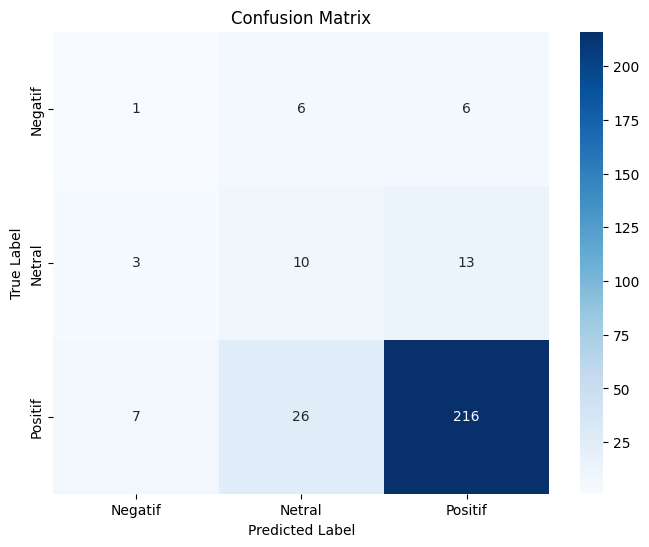

Sensitivity: 0.97
Specificity: 0.14


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings

# Menonaktifkan peringatan yang muncul
warnings.filterwarnings("ignore")

# Path ke file CSV
file_path = '/content/stopwords_filtered.csv'

# Membaca dataset
df = pd.read_csv(file_path)
df['cleaned_review'] = df['cleaned_review'].fillna('')

# Memetakan rating angka ke label sentimen
def map_rating_to_label(rating):
    try:
        rating = int(rating)
        if rating in [1, 2]:
            return 'Negatif'
        elif rating == 3:
            return 'Netral'
        elif rating in [4, 5]:
            return 'Positif'
    except ValueError:
        return 'Unknown'
    return 'Unknown'

# Menerapkan fungsi ke kolom Rating
df['Rating'] = df['Rating'].apply(map_rating_to_label)

# Menyaring data yang valid
valid_classes = ['Negatif', 'Netral', 'Positif']
df = df[df['Rating'].isin(valid_classes)]
df = df[df['cleaned_review'].str.strip().ne('')]

# Fitur dan label
X = df['cleaned_review']
y = df['Rating']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vect = vectorizer.fit_transform(X)

# Menampilkan beberapa fitur hasil TF-IDF
print("TF-IDF Matrix (5 rows x 10 columns):")
print(pd.DataFrame(X_vect.toarray(), columns=vectorizer.get_feature_names_out()).iloc[:5, :10])

# Split data ke train dan test
X_train_vect, X_test_vect, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE untuk menyeimbangkan kelas pada data latih
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vect, y_train)

# Training model Naive Bayes
classifier = MultinomialNB()

# Cross-validation
cv_scores = cross_val_score(classifier, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Average Cross-validation Accuracy: {cv_scores.mean():.2f}")

# Evaluasi model menggunakan data uji
classifier.fit(X_train_balanced, y_train_balanced)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, naive_bayes_pred, labels=valid_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_classes, yticklabels=valid_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ekstrak nilai confusion matrix
TP = cm[2, 2]  # True Positif untuk 'Positif'
TN = cm[0, 0]  # True Negatif untuk 'Negatif'
FP = cm[0, 2]  # False Positif untuk 'Negatif' yang diprediksi 'Positif'
FN = cm[2, 0]  # False Negatif untuk 'Positif' yang diprediksi 'Negatif'

# Sensitivity (Recall)
sensitivity = TP / (TP + FN) if TP + FN > 0 else 0

# Specificity
specificity = TN / (TN + FP) if TN + FP > 0 else 0

# Print Sensitivity dan Specificity
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

WORD2VEC ACCURACY

Hasil Evaluasi Model:
              precision    recall  f1-score   support

    Negative       0.06      0.25      0.09        60
     Neutral       0.10      0.24      0.14       119
    Positive       0.88      0.59      0.70      1158

    accuracy                           0.54      1337
   macro avg       0.34      0.36      0.31      1337
weighted avg       0.77      0.54      0.63      1337



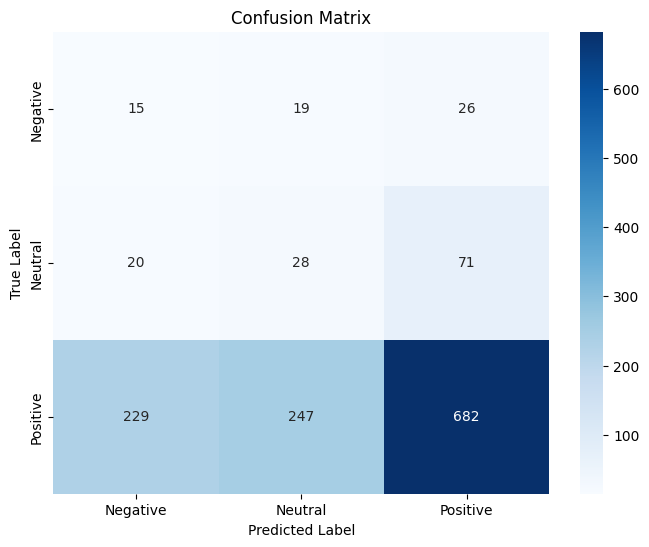


Cross-validation Scores (Naive Bayes): [0.58       0.46       0.58       0.6        0.51020408]
Average Cross-validation Accuracy: 0.55

=== Hasil Word2Vec ===

Kata 'produk' tidak ditemukan dalam model Word2Vec.
Kata 'produk' tidak ditemukan dalam model Word2Vec.

Rata-rata vektor untuk beberapa kalimat:
Kalimat 1: ['serum', 'retinol', 'kandung', 'suprisingly', 'efek', 'tingling', 'cekat', 'cekit', 'pas', 'tekstur', 'light', 'cenderung', 'watery', 'pas', 'apply', 'langsung', 'cepat', 'serap', 'apaapa', 'serum', 'rasai', 'efek', 'apaapa', 'sih', 'bangun', 'pagi', 'lifting', 'wajah', 'segi', 'harga', 'kandung', 'serum', 'worth', 'price', 'worth', 'try']
Rata-rata vektor: [-0.24248017  0.4273365  -0.00957429  0.22223881  0.09837703 -0.8390156
  0.09928895  0.8524105  -0.5081001  -0.3433263  -0.11300492 -0.53723913
  0.02265745  0.3082998   0.3756219  -0.15488647  0.13816638 -0.5842198
 -0.05302485 -0.8913768   0.33883262  0.17084303  0.35896152 -0.35730672
  0.00794624  0.04332103 -0.43

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Menonaktifkan peringatan yang muncul
warnings.filterwarnings("ignore")

# Langkah 1: Load Data
data = pd.read_csv("/content/stopwords_filtered.csv")
texts = data['cleaned_review']
labels = data['Label']

# Langkah 2: Tokenisasi
texts = texts.astype(str)
texts = texts.fillna('')

# Tokenisasi teks ke dalam list of words
tokenized_texts = [text.split() for text in texts]

# Langkah 3: Latih Word2Vec
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Langkah 4: Konversi Teks ke Vektor
def get_average_word2vec(sentence, model, vector_size):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

vector_size = w2v_model.vector_size
X = np.array([get_average_word2vec(sentence, w2v_model, vector_size) for sentence in tokenized_texts])

# Langkah 5: Split Data
train_size = 100
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Langkah 6: Oversampling dengan SMOTE
# Normalisasi data sebelum SMOTE
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Terapkan SMOTE untuk menangani ketidakseimbangan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Langkah 7: Latih Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Langkah 8: Evaluasi Model
y_pred = nb_model.predict(X_test)
print("Hasil Evaluasi Model:")
print(classification_report(y_test, y_pred))

# Langkah 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Langkah 10: Cross-validation
cross_val_scores = cross_val_score(nb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"\nCross-validation Scores (Naive Bayes): {cross_val_scores}")
print(f"Average Cross-validation Accuracy: {cross_val_scores.mean():.2f}")

# Langkah 11: Menampilkan Hasil Word2Vec
print("\n=== Hasil Word2Vec ===")

# Vektor untuk kata tertentu
word = "produk"  # Ganti dengan kata yang ada dalam data
if word in w2v_model.wv:
    print(f"\nVektor untuk kata '{word}':")
    print(w2v_model.wv[word])
else:
    print(f"\nKata '{word}' tidak ditemukan dalam model Word2Vec.")

# Kata-kata yang mirip dengan kata tertentu
if word in w2v_model.wv:
    print(f"\nKata-kata yang mirip dengan '{word}':")
    similar_words = w2v_model.wv.most_similar(word, topn=5)
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
else:
    print(f"Kata '{word}' tidak ditemukan dalam model Word2Vec.")

# Rata-rata vektor untuk beberapa kalimat
print("\nRata-rata vektor untuk beberapa kalimat:")
for i, sentence in enumerate(tokenized_texts[:5]):
    avg_vector = get_average_word2vec(sentence, w2v_model, vector_size)
    print(f"Kalimat {i+1}: {sentence}")
    print(f"Rata-rata vektor: {avg_vector}\n")


# Ekstrak nilai confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall)
sensitivity = TP / (TP + FN) if TP + FN > 0 else 0

# Specificity
specificity = TN / (TN + FP) if TN + FP > 0 else 0

# Print Sensitivity dan Specificity
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


## 2. Algoritma KNN

TF IDF ACCURACY

TF-IDF Matrix (5 rows x 10 columns):
   aaa  aaaa  aaaaa  abad  abis  abisin  absen  absorb  acara  acid
0  0.0   0.0    0.0   0.0   0.0     0.0    0.0     0.0    0.0   0.0
1  0.0   0.0    0.0   0.0   0.0     0.0    0.0     0.0    0.0   0.0
2  0.0   0.0    0.0   0.0   0.0     0.0    0.0     0.0    0.0   0.0
3  0.0   0.0    0.0   0.0   0.0     0.0    0.0     0.0    0.0   0.0
4  0.0   0.0    0.0   0.0   0.0     0.0    0.0     0.0    0.0   0.0
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Cross-validation Scores:
[0.74093151 0.74472643 0.63237183 0.70844671 0.75132717]
Average Cross-validation F1-Weighted Score: 0.72

Classification Report K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

    Negative       0.06      0.46      0.11        13
     Neutral       0.10      0.42      0.16        26
    Positive       0.95      0.30      0.46       249

    accuracy                           0.32       288
   macro avg   

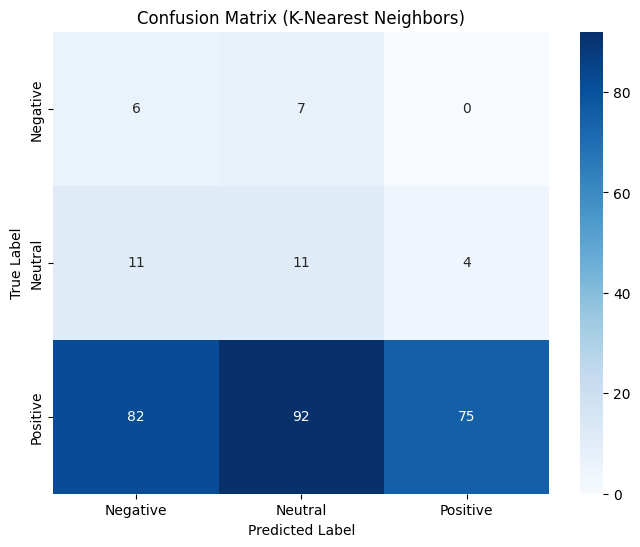

Sensitivity: 0.50
Specificity: 0.46


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Menonaktifkan peringatan yang muncul
warnings.filterwarnings("ignore")

# Load Data
data = pd.read_csv("/content/stopwords_filtered.csv")
texts = data['cleaned_review'].astype(str).fillna('')  # Kolom teks
labels = data['Label']  # Kolom label

# Representasi dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.8)  # Parameter ditambahkan
X_tfidf = vectorizer.fit_transform(texts)

# Menampilkan beberapa fitur hasil TF-IDF
print("TF-IDF Matrix (5 rows x 10 columns):")
print(pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).iloc[:5, :10])

# Dimensionality Reduction dengan TruncatedSVD
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(X_tfidf)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_svd, labels, test_size=0.2, random_state=42, stratify=labels)

# Terapkan ADASYN untuk oversampling
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Scaling Fitur dengan StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_model = KNeighborsClassifier()

# Cross-validation dengan GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted', n_jobs=-1)

# Menjalankan GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan hasil GridSearchCV
print(f"Best KNN Parameters: {grid_search.best_params_}")

# Model KNN dengan parameter terbaik
best_knn_model = grid_search.best_estimator_

# Cross-validation dengan StratifiedKFold di luar GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_knn_model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1_weighted')

# Menampilkan hasil cross-validation
print("\nCross-validation Scores:")
print(cv_scores)
print(f"Average Cross-validation F1-Weighted Score: {cv_scores.mean():.2f}")

# Pelatihan model pada seluruh training set
best_knn_model.fit(X_train_resampled, y_train_resampled)

# Prediksi menggunakan model
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluasi
print("\nClassification Report K-Nearest Neighbors (KNN):")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ekstrak nilai confusion matrix
TP = cm[1, 1]  # True Positif
TN = cm[0, 0]  # True Negatif
FP = cm[0, 1]  # False Positif
FN = cm[1, 0]  # False Negatif

# Sensitivity (Recall)
sensitivity = TP / (TP + FN) if TP + FN > 0 else 0

# Specificity
specificity = TN / (TN + FP) if TN + FP > 0 else 0

# Print Sensitivity dan Specificity
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

WORD2VEC

Hasil Evaluasi Model:
              precision    recall  f1-score   support

    Negative       0.04      0.35      0.08        60
     Neutral       0.11      0.25      0.16       119
    Positive       0.88      0.44      0.58      1158

    accuracy                           0.42      1337
   macro avg       0.34      0.35      0.27      1337
weighted avg       0.77      0.42      0.52      1337



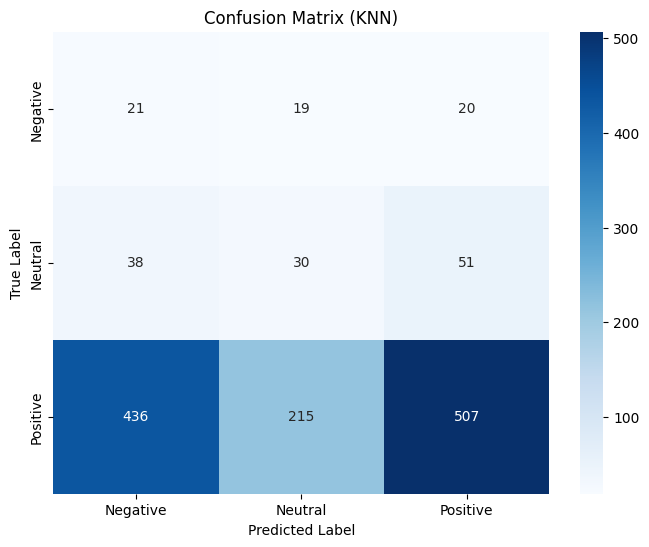


Cross-validation Scores (KNN): [0.74       0.74       0.74       0.82       0.83673469]
Average Cross-validation Accuracy: 0.78

=== Hasil Word2Vec ===

Kata 'produk' tidak ditemukan dalam model Word2Vec.
Kata 'produk' tidak ditemukan dalam model Word2Vec.

Rata-rata vektor untuk beberapa kalimat:
Kalimat 1: ['serum', 'retinol', 'kandung', 'suprisingly', 'efek', 'tingling', 'cekat', 'cekit', 'pas', 'tekstur', 'light', 'cenderung', 'watery', 'pas', 'apply', 'langsung', 'cepat', 'serap', 'apaapa', 'serum', 'rasai', 'efek', 'apaapa', 'sih', 'bangun', 'pagi', 'lifting', 'wajah', 'segi', 'harga', 'kandung', 'serum', 'worth', 'price', 'worth', 'try']
Rata-rata vektor: [-0.3350893   0.40237102 -0.14277937  0.18395859  0.09788463 -0.89918315
  0.18415317  0.6552902  -0.5422498  -0.37659207 -0.06979781 -0.68253493
 -0.15461521  0.33606774  0.32731995 -0.16119137  0.09924087 -0.7473056
 -0.006252   -0.8407824   0.34402543  0.2638713   0.53658795 -0.2711658
  0.2365444   0.0736369  -0.44190374 -

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Load Data
data = pd.read_csv("/content/stopwords_filtered.csv")
texts = data['cleaned_review']
labels = data['Label']

# Langkah 2: Tokenisasi
texts = texts.astype(str)
texts = texts.fillna('')

# Tokenisasi teks ke dalam list of words
tokenized_texts = [text.split() for text in texts]

# Langkah 3: Latih Word2Vec
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Langkah 4: Konversi Teks ke Vektor
def get_average_word2vec(sentence, model, vector_size):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

vector_size = w2v_model.vector_size
X = np.array([get_average_word2vec(sentence, w2v_model, vector_size) for sentence in tokenized_texts])

# Langkah 5: Split Data
train_size = 100
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

# Langkah 6: Oversampling dengan SMOTE
# Normalisasi data sebelum SMOTE
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Terapkan SMOTE untuk menangani ketidakseimbangan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Langkah 7: Latih Model KNN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_resampled, y_train_resampled)

# Langkah 8: Evaluasi Model
y_pred = knn_model.predict(X_test)
print("Hasil Evaluasi Model:")
print(classification_report(y_test, y_pred))

# Langkah 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Langkah 10: Cross-validation
cross_val_scores = cross_val_score(knn_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"\nCross-validation Scores (KNN): {cross_val_scores}")
print(f"Average Cross-validation Accuracy: {cross_val_scores.mean():.2f}")

# Langkah 11: Menampilkan Hasil Word2Vec
print("\n=== Hasil Word2Vec ===")

# Vektor untuk kata tertentu
word = "produk"  # Ganti dengan kata yang ada dalam data
if word in w2v_model.wv:
    print(f"\nVektor untuk kata '{word}':")
    print(w2v_model.wv[word])
else:
    print(f"\nKata '{word}' tidak ditemukan dalam model Word2Vec.")

# Kata-kata yang mirip dengan kata tertentu
if word in w2v_model.wv:
    print(f"\nKata-kata yang mirip dengan '{word}':")
    similar_words = w2v_model.wv.most_similar(word, topn=5)
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
else:
    print(f"Kata '{word}' tidak ditemukan dalam model Word2Vec.")

# Rata-rata vektor untuk beberapa kalimat
print("\nRata-rata vektor untuk beberapa kalimat:")
for i, sentence in enumerate(tokenized_texts[:5]):
    avg_vector = get_average_word2vec(sentence, w2v_model, vector_size)
    print(f"Kalimat {i+1}: {sentence}")
    print(f"Rata-rata vektor: {avg_vector}\n")


# Ekstrak nilai confusion matrix
TP = cm[1, 1]  # True Positif
TN = cm[0, 0]  # True Negatif
FP = cm[0, 1]  # False Positif
FN = cm[1, 0]  # False Negatif

# Sensitivity (Recall)
sensitivity = TP / (TP + FN) if TP + FN > 0 else 0

# Specificity
specificity = TN / (TN + FP) if TN + FP > 0 else 0

# Print Sensitivity dan Specificity
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


## 3. RANDOM FOREST

TF-IDF ACCURACY

TF-IDF Matrix (5 rows x 10 columns):
    aa  aaa  aaaa  aaaaa  aagak  aannnd  abad  abis  abisga  abisin
0  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
1  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
2  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
3  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0
4  0.0  0.0   0.0    0.0    0.0     0.0   0.0   0.0     0.0     0.0

Cross-validation Scores:
[0.82885906 0.81512605 0.81512605 0.81008403 0.82016807]
Average Cross-validation Accuracy: 0.82

Classification Report Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.12      0.31      0.18        13
     Neutral       0.19      0.38      0.26        26
    Positive       0.92      0.76      0.83       249

    accuracy                           0.70       288
   macro avg       0.41      0.48      0.42       288
weighted avg       0.82      0.70      0.75       288



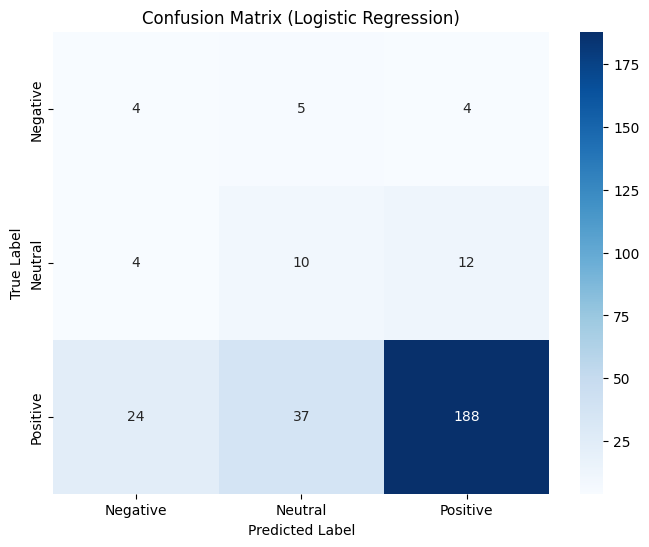

Sensitivity: 0.71
Specificity: 0.44


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Data
data = pd.read_csv("/content/stopwords_filtered.csv")
texts = data['cleaned_review'].astype(str).fillna('')
labels = data['Label']

# Representasi dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(texts)

# Menampilkan beberapa fitur hasil TF-IDF
print("TF-IDF Matrix (5 rows x 10 columns):")
print(pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).iloc[:5, :10])

# Dimensionality Reduction dengan TruncatedSVD (lebih efisien dari PCA)
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(X_tfidf)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_svd, labels, test_size=0.2, random_state=42, stratify=labels)

# Terapkan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Terapkan RandomUnderSampler untuk undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_smote, y_train_smote)

# Model Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=200)  # Logistic Regression dengan lebih banyak iterasi

# Cross-validation dengan StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Menampilkan hasil cross-validation
print("\nCross-validation Scores:")
print(cv_scores)
print(f"Average Cross-validation Accuracy: {cv_scores.mean():.2f}")

# Pelatihan model pada seluruh training set
logreg_model.fit(X_train_resampled, y_train_resampled)

# Prediksi menggunakan model
y_pred = logreg_model.predict(X_test)

# Evaluasi
print("\nClassification Report Logistic Regression:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ekstrak nilai confusion matrix
TP = cm[1, 1]  # True Positif
TN = cm[0, 0]  # True Negatif
FP = cm[0, 1]  # False Positif
FN = cm[1, 0]  # False Negatif

# Sensitivity (Recall)
sensitivity = TP / (TP + FN) if TP + FN > 0 else 0

# Specificity
specificity = TN / (TN + FP) if TN + FP > 0 else 0

# Print Sensitivity dan Specificity
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

WORD2VEC ACCURACY


Classification Report (Balanced Random Forest):
              precision    recall  f1-score   support

    Negative       0.02      0.08      0.03        13
     Neutral       0.11      0.27      0.16        26
    Positive       0.88      0.63      0.74       249

    accuracy                           0.58       288
   macro avg       0.34      0.33      0.31       288
weighted avg       0.77      0.58      0.65       288



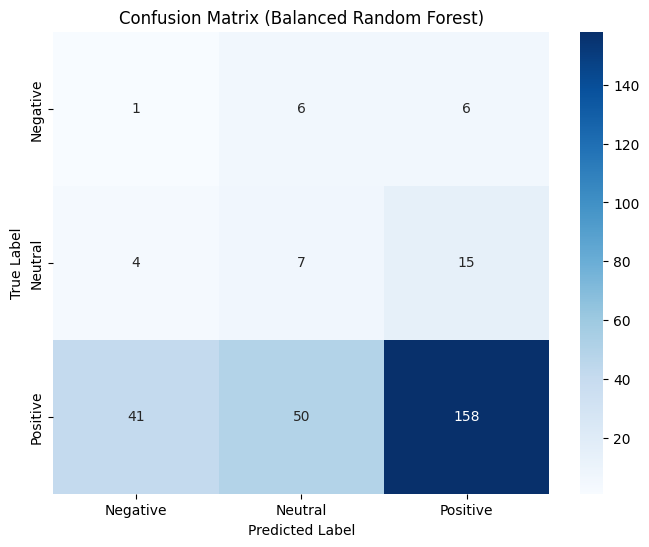


Cross-validation Scores (Balanced Random Forest): [0.73684211 0.70263789 0.76258993 0.70983213 0.7146283 ]
Average Cross-validation Accuracy: 0.73
Sensitivity: 0.64
Specificity: 0.14


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Langkah 1: Membaca File CSV
data = pd.read_csv("/content/stopwords_filtered.csv")
texts = data['cleaned_review'].astype(str).fillna('')
labels = data['Label']

# Langkah 2: Tokenisasi Teks
tokenized_texts = [text.split() for text in texts]

# Langkah 3: Latih Model Word2Vec
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Langkah 4: Konversi Teks menjadi Vektor (Rata-rata dari kata-kata dalam kalimat)
def get_average_word2vec(sentence, model, vector_size):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

vector_size = w2v_model.vector_size
X_word2vec = np.array([get_average_word2vec(sentence, w2v_model, vector_size) for sentence in tokenized_texts])

# Langkah 5: Split Data menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, labels, test_size=0.2, random_state=42, stratify=labels)

# Langkah 6: Menyeimbangkan Data dengan SMOTE atau ADASYN
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Langkah 7: Gunakan Balanced Random Forest atau EasyEnsemble
rf_model_brf = BalancedRandomForestClassifier(random_state=42, n_estimators=200, max_depth=15, min_samples_leaf=5)
rf_model_brf.fit(X_train_smote, y_train_smote)

# Langkah 8: Evaluasi Model
y_pred_brf = rf_model_brf.predict(X_test)

# Classification Report dengan zero_division
print("\nClassification Report (Balanced Random Forest):")
print(classification_report(y_test, y_pred_brf, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_brf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix (Balanced Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross-validation scores
from sklearn.model_selection import cross_val_score
cross_val_scores_brf = cross_val_score(rf_model_brf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"\nCross-validation Scores (Balanced Random Forest): {cross_val_scores_brf}")
print(f"Average Cross-validation Accuracy: {cross_val_scores_brf.mean():.2f}")

# Menghitung Sensitivity dan Specificity dari confusion matrix
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Sensitivity (Recall untuk kelas positif)
sensitivity = TP / (TP + FN) if TP + FN > 0 else 0

# Specificity (Recall untuk kelas negatif)
specificity = TN / (TN + FP) if TN + FP > 0 else 0

# Print Sensitivity dan Specificity
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
